In [20]:
import os 
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Construct Training Dataset

- feature data set

In [4]:
def Read_Pickle(file_path):
    
    pickle_in = open(file_path,"rb")
    pickle_in  = pickle.load(pickle_in)

    return pickle_in

all_feature_df = Read_Pickle(r"all_feature_df.pickle")
all_feature_df

,row_id,log_return1_realized_volatility_150,log_return2_realized_volatility_150,wap_balance_mean_150,price_spread_mean_150,bid_spread_mean_150,ask_spread_mean_150,volume_imbalance_mean_150,total_volume_mean_150,wap1_mean_150,...,trade_log_return_realized_volatility_300,trade_per_size_mean_300,trade_price_mean_300,trade_order_count_mean_300,trade_size_mean_300,trade_log_return_realized_volatility_450,trade_per_size_mean_450,trade_price_mean_450,trade_order_count_mean_450,trade_size_mean_450
0,0-1000,0.001446,0.004108,2.448913e-05,0.000464,42.983740,35.943089,157.186992,271.886179,0.998554,...,0.000908,15.328571,0.998402,2.142857,34.142857,0.000644,16.120000,0.998464,3.000000,43.000000
1,0-10000,0.002635,0.003605,-6.291499e-05,0.000535,-33.904040,0.893939,160.636364,402.242424,1.000013,...,0.001083,22.169048,1.000283,3.428571,86.714286,0.000733,22.333333,1.000144,2.333333,81.000000
2,0-10005,0.007001,0.011265,3.024939e-04,0.002007,31.873134,-31.820896,107.037313,347.022388,1.002181,...,0.002449,12.886724,1.002050,3.416667,79.916667,0.002223,12.996753,1.001380,4.000000,84.375000
3,0-10017,0.014127,0.018953,1.010921e-04,0.003803,-44.165605,0.923567,143.178344,446.273885,0.997954,...,0.007005,30.191122,1.000240,3.950000,108.150000,0.005085,19.033814,0.998491,4.416667,71.833333
4,0-10030,0.002191,0.003706,1.128659e-05,0.000569,15.829457,25.767442,77.286822,350.930233,0.999386,...,0.001090,34.142857,0.999041,2.000000,90.071429,0.000941,48.666667,0.999022,2.142857,117.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428927,99-9972,0.001265,0.001850,2.430846e-06,0.000210,-285.484848,-377.078283,537.522727,2487.416667,1.002870,...,0.000987,70.907540,1.003342,3.226415,256.018868,0.000768,65.187821,1.003537,2.730769,220.384615
428928,99-9973,0.008167,0.011983,-1.868807e-07,0.000717,-11.769424,-91.130326,348.894737,859.055138,1.005974,...,0.004671,74.775854,1.006534,4.553398,359.893204,0.003244,71.710942,1.005701,4.581818,362.563636
428929,99-9976,0.004525,0.004952,1.298069e-05,0.000467,-135.059783,-6.440217,730.114130,1195.994565,0.990907,...,0.002327,62.092654,0.990129,3.472527,258.879121,0.001678,55.321170,0.989176,3.854545,245.218182
428930,99-9988,0.001118,0.001451,4.902781e-05,0.000170,-154.229773,-668.724919,726.708738,3815.012945,0.999850,...,0.000745,83.895184,0.999644,5.593750,501.687500,0.000503,76.895055,0.999510,5.062500,428.125000


- train target dataset

In [5]:
train_df = pd.read_csv('./train.csv')
train_df['row_id'] = train_df['stock_id'].astype(str) + '-' + train_df['time_id'].astype(str)
train_df = train_df[['row_id','target']]
train_df

,row_id,target
0,0-5,0.004136
1,0-11,0.001445
2,0-16,0.002168
3,0-31,0.002195
4,0-62,0.001747
...,...,...
428927,126-32751,0.003461
428928,126-32753,0.003113
428929,126-32758,0.004070
428930,126-32763,0.003357


- merge train target and feature dataframe

In [48]:
df_joined = train_df.merge(all_feature_df, on = ['row_id'], how = 'left')
df_joined.index = df_joined['row_id']
df_joined = df_joined.drop(['row_id'],axis=1)
df_joined = df_joined.fillna(value=0)
df_joined

,target,log_return1_realized_volatility_150,log_return2_realized_volatility_150,wap_balance_mean_150,price_spread_mean_150,bid_spread_mean_150,ask_spread_mean_150,volume_imbalance_mean_150,total_volume_mean_150,wap1_mean_150,...,trade_log_return_realized_volatility_300,trade_per_size_mean_300,trade_price_mean_300,trade_order_count_mean_300,trade_size_mean_300,trade_log_return_realized_volatility_450,trade_per_size_mean_450,trade_price_mean_450,trade_order_count_mean_450,trade_size_mean_450
row_id,,,,,,,,,,,,,,,,,,,,,
0-5,0.004136,0.003796,0.006087,0.000078,0.000858,-1.900862,-15.926724,123.586207,327.431034,1.003832,...,0.001308,18.628798,1.003679,2.571429,75.571429,0.001060,16.764626,1.003417,2.642857,74.428571
0-11,0.001445,0.001058,0.002262,0.000056,0.000353,64.722543,-30.381503,151.566474,419.277457,1.000301,...,0.000587,26.822917,1.000392,2.250000,56.250000,0.000501,39.966667,1.000488,2.200000,82.800000
0-16,0.002168,0.002138,0.004019,-0.000186,0.000679,-27.386555,87.033613,132.084034,428.537815,0.999126,...,0.001137,27.236111,0.998508,3.166667,99.083333,0.001048,32.240741,0.998130,3.666667,120.555556
0-31,0.002195,0.002196,0.003273,0.000111,0.000921,23.654321,17.049383,151.765432,424.234568,0.998464,...,0.001089,34.623457,0.998780,5.111111,172.888889,0.000802,30.250000,0.998106,3.666667,171.333333
0-62,0.001747,0.001609,0.002927,-0.000052,0.000395,19.637037,50.370370,131.474074,371.266667,0.999618,...,0.000453,19.656506,0.999555,4.909091,110.818182,0.000360,2.725000,0.999547,3.500000,10.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126-32751,0.003461,0.003438,0.005201,0.000008,0.000904,48.594714,3.801762,152.731278,412.590308,0.999375,...,0.001451,19.007407,0.999051,2.055556,44.222222,0.001058,19.750000,0.998939,1.833333,40.916667
126-32753,0.003113,0.003972,0.004569,-0.000138,0.000726,-4.360947,-2.538462,139.384615,225.834320,1.002893,...,0.001791,10.883333,1.003403,3.550000,55.350000,0.001388,9.397436,1.003850,1.769231,25.076923
126-32758,0.004070,0.002955,0.005654,0.000066,0.000714,64.283582,-0.746269,246.313433,339.199005,1.001142,...,0.001580,45.681250,1.000844,2.541667,114.583333,0.001244,31.638889,1.001030,2.166667,58.000000


# Train and Save the Model

- train test split and fit the model.

In [50]:
X = df_joined.drop(['target'],axis=1)
y = df_joined['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("X train dataset:\n",X_train.shape)
print("y train dataset:\n",y_train.shape)

print("X test dataset:\n",X_test.shape)
print("y test dataset:\n",y_test.shape)

X train dataset:
 (321699, 45)
y train dataset:
 (321699,)
X test dataset:
 (107233, 45)
y test dataset:
 (107233,)


In [51]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [53]:
y_pred = forest.predict(X_test)
y_pred

array([0.00683226, 0.00217345, 0.0031407 , ..., 0.00276517, 0.00360032,
       0.00348804])

- compare to baseline autocorrelation realized volatility model

In [56]:
def rmspe(y_true, y_pred):
    return  (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))))

y_pred_df = forest.predict(X)

R2 = round(r2_score(y_true = df_joined['target'], y_pred = y_pred_df ),3)
RMSPE = round(rmspe(y_true = df_joined['target'], y_pred =  y_pred_df ),3)

print(f'Performance of the naive prediction:\nR2 score: {R2}, \nRMSPE: {RMSPE}.')

Performance of the naive prediction:
R2 score: 0.931, 
RMSPE: 0.179.


- Score on train-test spilt. 

In [55]:
R2 = round(r2_score(y_true = y_test, y_pred = y_pred),3)
RMSPE = round(rmspe(y_true = y_test, y_pred = y_pred),3)

print(f'Performance of the naive prediction:\nR2 score: {R2}, \nRMSPE: {RMSPE}.')

Performance of the naive prediction:
R2 score: 0.808, 
RMSPE: 0.299.


Elapsed time to compute the importances: 0.345 seconds


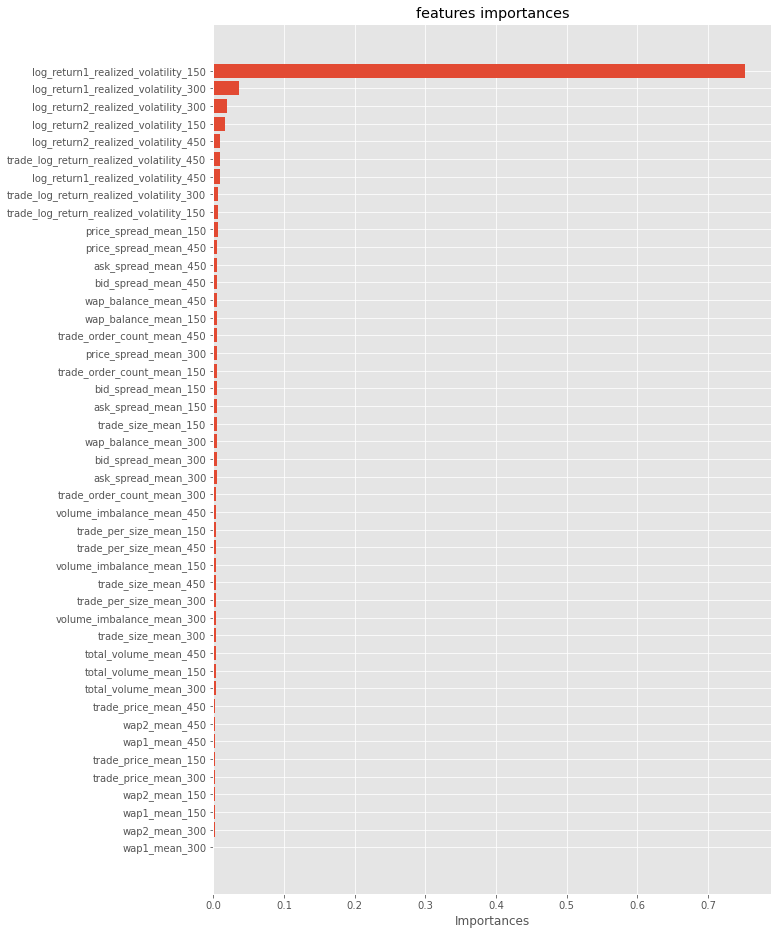

,Importances
log_return1_realized_volatility_150,0.7520
log_return1_realized_volatility_300,0.0364
log_return2_realized_volatility_300,0.0191
log_return2_realized_volatility_150,0.0165
log_return2_realized_volatility_450,0.0096
trade_log_return_realized_volatility_450,0.0087
log_return1_realized_volatility_450,0.0086
trade_log_return_realized_volatility_300,0.0067
trade_log_return_realized_volatility_150,0.0065
price_spread_mean_150,0.0061


In [71]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.DataFrame(importances, index = X.columns,columns=['Importances']).sort_values(['Importances'],ascending=False).round(decimals=4)

fig,ax = plt.subplots(figsize=(10,16))
ax.set_title('features importances')
ax.barh(forest_importances.index, forest_importances.Importances, align='center')
ax.set_xlabel('Importances')
ax.invert_yaxis()  # labels read top-to-bottom
plt.show()

forest_importances

- Joblib to save the model

In [58]:
import joblib

filename = 'RF_finalized_model.sav'
joblib.dump(forest, filename)

['RF_finalized_model.sav']